In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_curve, auc


In [39]:
data = pd.read_csv('..\Data\Titanic_train.csv')

In [40]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
# sns.pairplot(data=data)

In [44]:
#Relleno de nulos
data['Embarked'].fillna(value='S/D', inplace=True)

#Relleno con el proedio. Revisar. 
data['Age'].fillna(value=data['Age'].mean(), inplace=True)
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [45]:
#Elimino columnas conflictivas
data.drop(columns=['Name', 'Ticket','Cabin'], inplace=True)

In [46]:
#Encoding
enc = OneHotEncoder(handle_unknown='error', drop='first')

enc.fit(data[['Sex','Embarked', ]])
df_enc=pd.DataFrame(enc.transform(data[['Sex','Embarked', ]]).toarray(),)
df_enc.columns=enc.get_feature_names(['Sex','Embarked', ])

data=data.merge(right=df_enc, left_index=True, right_index=True)
data.drop(columns=['Sex','Embarked', ], inplace=True)
data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_S/D
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,0.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,0.0


In [47]:
#Feature engineering
data['AgexPclass']=data['Age']*data['Pclass']
data['AgexSex_male']=data['Age']*data['Sex_male']
data['SibSpxParch']=data['SibSp']*data['Parch']

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Sex_male      891 non-null    float64
 8   Embarked_Q    891 non-null    float64
 9   Embarked_S    891 non-null    float64
 10  Embarked_S/D  891 non-null    float64
 11  AgexPclass    891 non-null    float64
 12  AgexSex_male  891 non-null    float64
 13  SibSpxParch   891 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 97.6 KB


In [49]:
#separo en train test
target=['Survived']
features= list(data.columns.difference(target))
X=data[features]
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=data[target], random_state=42)
y_train =np.array(y_train).ravel()
y_test =np.array(y_test).ravel()

In [50]:
#Standard scaler
scaler=StandardScaler()

scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
#Vamos con un gridsearch de todos los modelos que conocemos

In [52]:
models = [GaussianNB(),
          LogisticRegression(),
          KNeighborsClassifier()]

In [53]:
params = [
    {'var_smoothing': [1e-09, 1e-08,1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1, 10]
        
    },
    
    {'C': [0.1,0.5,0.8, 1, 10, 100],
     'penalty': ['l1', 'l2', 'elasticnet'],
     'solver': ['saga', 'liblinear']},
    
    {'n_neighbors': range(1,50),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]}
]

In [54]:
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [55]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='f1', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=GaussianNB(), n_jobs=4,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='f1')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.1, 0.5, 0.8, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'liblinear']},
             scoring='f1')


C:\Users\Ivan\.conda\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='f1')


In [56]:
for i in grids:
    print('f1_train', f1_score(y_true=y_train, y_pred=i.predict(X_train)))
    print('f1_test', f1_score(y_true=y_test, y_pred=i.predict(X_test)))
    
    print ('Best score (f1)', i.best_score_)
    print ('Best estimator', i.best_estimator_)
    print ('Best params', i.best_params_)
    print()

f1_train 0.7300884955752213
f1_test 0.6666666666666666
Best score (f1) 0.7157075462223282
Best estimator GaussianNB(var_smoothing=0.1)
Best params {'var_smoothing': 0.1}

f1_train 0.7535641547861507
f1_test 0.7195121951219512
Best score (f1) 0.7472012511298225
Best estimator LogisticRegression(C=0.5, solver='saga')
Best params {'C': 0.5, 'penalty': 'l2', 'solver': 'saga'}

f1_train 1.0
f1_test 0.7532467532467532
Best score (f1) 0.7674520199973017
Best estimator KNeighborsClassifier(n_neighbors=16, p=1, weights='distance')
Best params {'n_neighbors': 16, 'p': 1, 'weights': 'distance'}



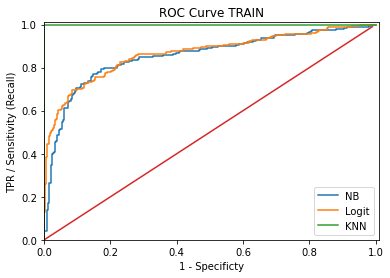

AUC-NB= 	 0.8539
AUC-Logit= 	 0.8663
AUC-KNN= 	 1.0


In [57]:
y_preds_NB = grids[0].predict(X_train)
y_probs_NB = grids[0].predict_proba(X_train)

y_preds_log = grids[1].predict(X_train)
y_probs_log = grids[1].predict_proba(X_train)

y_preds_knn = grids[2].predict(X_train)
y_probs_knn = grids[2].predict_proba(X_train)

fpr_nb, tpr_nb, thr_nb = roc_curve(y_train, y_probs_NB[:,1])
fpr_log, tpr_log, thr_log = roc_curve(y_train, y_probs_log[:,1])
fpr_knn, tpr_knn, thr_knn = roc_curve(y_train, y_probs_knn[:,1])


plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity (Recall)')
plt.title('ROC Curve TRAIN')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_knn,tpr_knn)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit', 'KNN'])
plt.show()

print(f'AUC-NB= \t {round(auc(fpr_nb, tpr_nb),4)}\n'
     f'AUC-Logit= \t {round(auc(fpr_log, tpr_log),4)}\n'
     f'AUC-KNN= \t {round(auc(fpr_knn, tpr_knn),4)}')

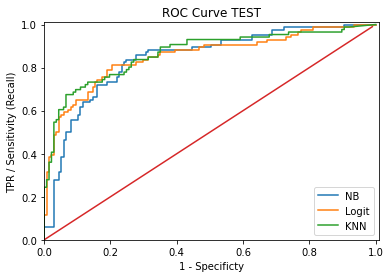

AUC-NB= 	 0.8422
AUC-Logit= 	 0.8533
AUC-KNN= 	 0.8661


In [58]:
y_preds_NB = grids[0].predict(X_test)
y_probs_NB = grids[0].predict_proba(X_test)

y_preds_log = grids[1].predict(X_test)
y_probs_log = grids[1].predict_proba(X_test)

y_preds_knn = grids[2].predict(X_test)
y_probs_knn = grids[2].predict_proba(X_test)

fpr_nb, tpr_nb, thr_nb = roc_curve(y_test, y_probs_NB[:,1])
fpr_log, tpr_log, thr_log = roc_curve(y_test, y_probs_log[:,1])
fpr_knn, tpr_knn, thr_knn = roc_curve(y_test, y_probs_knn[:,1])


plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity (Recall)')
plt.title('ROC Curve TEST')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_knn,tpr_knn)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit', 'KNN'])
plt.show()

print(f'AUC-NB= \t {round(auc(fpr_nb, tpr_nb),4)}\n'
     f'AUC-Logit= \t {round(auc(fpr_log, tpr_log),4)}\n'
     f'AUC-KNN= \t {round(auc(fpr_knn, tpr_knn),4)}')

In [ ]:
#Esto es para responder al desafio de Kaggle... no nos fue taan bien (65% accuracy, en la posicion 13000 de 14000)

In [59]:
data_test=pd.read_csv('..\Data\Titanic_test.csv')

In [60]:
#Relleno de nulos
data_test['Embarked'].fillna(value='S/D', inplace=True)


#Relleno con el proedio. Revisar. 
data_test['Age'].fillna(value=data['Age'].mean(), inplace=True)
data_test['Fare'].fillna(value=data['Fare'].mean(), inplace=True)

In [61]:
#Elimino columnas conflictivas
data_test.drop(columns=['Name', 'Ticket','Cabin'], inplace=True)

In [62]:
#Encoding

df_enc=pd.DataFrame(enc.transform(data_test[['Sex','Embarked']]).toarray(),)
df_enc.columns=enc.get_feature_names(['Sex','Embarked'])

data_test=data_test.merge(right=df_enc, left_index=True, right_index=True)
data_test.drop(columns=['Sex','Embarked'], inplace=True)
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Fare          418 non-null    float64
 6   Sex_male      418 non-null    float64
 7   Embarked_Q    418 non-null    float64
 8   Embarked_S    418 non-null    float64
 9   Embarked_S/D  418 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 32.8 KB


In [63]:
#Feature engineering
data_test['AgexPclass']=data_test['Age']*data_test['Pclass']
data_test['AgexSex_male']=data_test['Age']*data_test['Sex_male']
data_test['SibSpxParch']=data_test['SibSp']*data_test['Parch']

In [64]:
data_test=pd.DataFrame(data=scaler.transform(data_test), columns=data_test.columns)

In [65]:
y_pred_test = grids[1].predict(data_test)

In [66]:
y_pred_test.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [67]:
data_test = pd.DataFrame(data=scaler.inverse_transform(data_test), columns=data_test.columns)
data_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_S/D,AgexPclass,AgexSex_male,SibSpxParch
0,892.0,3.0,34.500000,0.0,0.0,7.8292,1.0,1.0,0.0,0.0,103.500000,34.500000,5.551115e-17
1,893.0,3.0,47.000000,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,141.000000,0.000000,5.551115e-17
2,894.0,2.0,62.000000,0.0,0.0,9.6875,1.0,1.0,0.0,0.0,124.000000,62.000000,5.551115e-17
3,895.0,3.0,27.000000,0.0,0.0,8.6625,1.0,0.0,1.0,0.0,81.000000,27.000000,5.551115e-17
4,896.0,3.0,22.000000,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,66.000000,0.000000,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,29.699118,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,89.097353,29.699118,5.551115e-17
414,1306.0,1.0,39.000000,0.0,0.0,108.9000,0.0,0.0,0.0,0.0,39.000000,0.000000,5.551115e-17
415,1307.0,3.0,38.500000,0.0,0.0,7.2500,1.0,0.0,1.0,0.0,115.500000,38.500000,5.551115e-17
416,1308.0,3.0,29.699118,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,89.097353,29.699118,5.551115e-17


In [70]:
Respuesta_Kaggle=pd.DataFrame(round(data_test['PassengerId'],0),dtype=int)
Respuesta_Kaggle['Survived']=y_pred_test
Respuesta_Kaggle

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [71]:
Respuesta_Kaggle.to_csv('..\Data\Respuesta_Kaggle.csv', index=False)